In [1]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline 

In [2]:
import sys
sys.path.append('../../')

In [3]:
import math
import torch
from torch import nn
from torch.nn import functional as F

In [4]:
from omd2l.data.TimeMachine import TimeMachine


/Users/oualid/opt/miniconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/oualid/opt/miniconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: /Users/oualid/opt/miniconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/image.so
  Expected in: /Users/oualid/opt/miniconda3/envs/pytorch/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [5]:
from omd2l.models.RNN.RNNScratch import RNNScratch
from omd2l.models.RNN.RNNLMScratch import RNNLMScratch
from omd2l.data.TimeMachine import TimeMachine
from omd2l.models.base.Trainer import Trainer


In [6]:
from omd2l.models.RNN.BiRNNScratch import BiRNNScratch
from omd2l.models.RNN.BiRNN  import BiRNN


In [7]:
from omd2l.models.RNN.LSTMScratch import LSTMScratch
from omd2l.models.RNN.LSTM import LSTM

In [8]:
from omd2l.models.RNN.GRUScratch import GRUScratch
from omd2l.models.RNN.GRU import GRU

In [9]:
from omd2l.models.RNN.RNN import RNN
from omd2l.models.RNN.RNNLM import RNNLM

In [10]:
from omd2l.models.RNN.StackedRNNScratch import StackedRNNScratch


In [13]:
from omd2l.utils.compute import try_gpu

In [8]:
batch_size, num_inputs, num_hiddens, num_steps = 2, 16, 32, 100
rnn = RNNScratch(num_inputs, num_hiddens)
X = torch.ones((num_steps, batch_size, num_inputs))
outputs, state = rnn(X)

In [9]:
def check_len(a, n):  #@save
    """Check the length of a list."""
    assert len(a) == n, f'list\'s length {len(a)} != expected length {n}'

def check_shape(a, shape):  #@save
    """Check the shape of a tensor."""
    assert a.shape == shape, \
            f'tensor\'s shape {a.shape} != expected shape {shape}'

check_len(outputs, num_steps)
check_shape(outputs[0], (batch_size, num_hiddens))
check_shape(state, (batch_size, num_hiddens))

## Bi-RNN

### From Scratch 

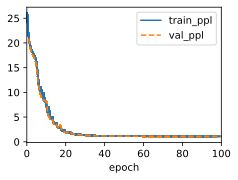

In [11]:
data = TimeMachine(batch_size=1024, num_steps=32)
rnn = BiRNNScratch(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLMScratch(rnn, vocab_size=len(data.vocab), lr=1)
trainer = Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [14]:
model.predict('it has', 20, data.vocab, try_gpu())

'it hasasasasasasasasasasas'